In [1]:
# external imports (for plotting) 
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/home/bzfschwa/conda/envs/mathprogvis/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# specific imports from this package
from mathprogvis import poly
from mathprogvis import mccormick
from mathprogvis import balas
from mathprogvis import quadratic

In [3]:
%matplotlib inline

In [4]:
# set up plotting style
sns.set_context('talk')

In [5]:
# helper function
def neg(ineq, var):
    'negate a single variable in an inequality'
    return dict((v,-c if v==var else c) for (v,c) in ineq.items())

In [6]:
# add variable names
x, y, b = 'x', 'y', ''

In [7]:
# compute approximated convex hull of quadratic constraint via tangents.
# the function takes to variables names (for y == x**2), bounds for x,
# and the number of discretization points.
s = quadratic.hull(x, y, -1, 3, n=17)
s

[{'': 3, 'x': 2, 'y': -1},
 {'': 1.0, 'x': 2.0, 'y': 1},
 {'': 0.5625, 'x': 1.5, 'y': 1},
 {'': 0.25, 'x': 1.0, 'y': 1},
 {'': 0.0625, 'x': 0.5, 'y': 1},
 {'': 0.0, 'x': -0.0, 'y': 1},
 {'': 0.0625, 'x': -0.5, 'y': 1},
 {'': 0.25, 'x': -1.0, 'y': 1},
 {'': 0.5625, 'x': -1.5, 'y': 1},
 {'': 1.0, 'x': -2.0, 'y': 1},
 {'': 1.5625, 'x': -2.5, 'y': 1},
 {'': 2.25, 'x': -3.0, 'y': 1},
 {'': 3.0625, 'x': -3.5, 'y': 1},
 {'': 4.0, 'x': -4.0, 'y': 1},
 {'': 5.0625, 'x': -4.5, 'y': 1},
 {'': 6.25, 'x': -5.0, 'y': 1},
 {'': 7.5625, 'x': -5.5, 'y': 1},
 {'': 9.0, 'x': -6.0, 'y': 1}]

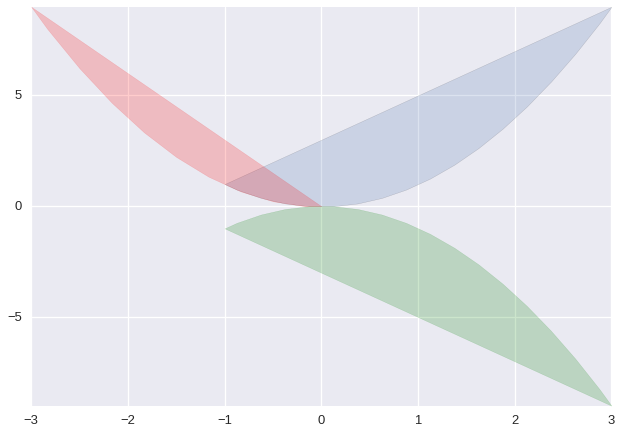

In [8]:
# showcase the quadratic hull feature for different bounds and signs
poly.plot2d(poly.polygon2D( poly.sparse2verts(s, [x, y])),
            poly.polygon2D( poly.sparse2verts(quadratic.hull(x, y, -3, 0, n=10), [x, y]), color='red'),
            poly.polygon2D( poly.sparse2verts([neg(i, y) for i in s], [x, y]), color='green'));

## Convex relaxation for Weymouth (pressure loss in gas pipelines) from recent paper by Borraz-Sanchez et al.

We will model $D = q|q|$ as $D(2y - 1) = t$, $y\in \{0,1\}$, $t = q^2$ and a couple of varbounds.

In [9]:
# setup variable names
D,q,y,t,b = 'D,q,y,t,'.split(',')

In [10]:
# define variable bounds
# again, the bounds of q (flow) are not symmetric w.r.t. 0
qlb, qub = -2, 3
Dlb, Dub = -qlb**2, qub**2
ylb, yub = 0, 1
tlb, tub = 0, max(-Dlb, Dub)

In [11]:
# create grid points and evaluate actual function
qq = np.linspace(qlb, qub)
DD = qq * np.abs(qq)

In [12]:
# compute the McCormick relaxation of D*(2* - 1) == t 
mc = mccormick.sparse_ineqs({D:1}, {y:2, b:-1}, {t:1}, [D, y, t], [Dlb, ylb, tlb], [Dub, yub, tub])
mc

[{'D': 1.0, 't': 1.0, 'y': 8.0},
 {'': 18.0, 'D': -1.0, 't': 1.0, 'y': -18.0},
 {'': 8.0, 'D': 1.0, 't': -1.0, 'y': -8.0},
 {'D': -1.0, 't': -1.0, 'y': 18.0}]

In [13]:
# compute the approx. convex relax. of t == q**2
quad = quadratic.hull(q, t, qlb, qub)
# We diverge here from the formulation in the paper (only symmetric flow bounds where used there)
#quad = quad[1:]            # don't use the secant cut (as in paper)
#quad += [{t:-1, b:tub}]    # add a weaker, axes-parallel version of secant cut 
quad

[{'': 6, 'q': 1, 't': -1},
 {'': 4.0, 'q': 4.0, 't': 1},
 {'': 3.0166204986149587, 'q': 3.4736842105263159, 't': 1},
 {'': 2.1717451523545712, 'q': 2.9473684210526319, 't': 1},
 {'': 1.4653739612188366, 'q': 2.4210526315789473, 't': 1},
 {'': 0.89750692520775632, 'q': 1.8947368421052633, 't': 1},
 {'': 0.46814404432132983, 'q': 1.3684210526315792, 't': 1},
 {'': 0.17728531855955676, 'q': 0.84210526315789469, 't': 1},
 {'': 0.024930747922437688, 'q': 0.31578947368421062, 't': 1},
 {'': 0.011080332409972275, 'q': -0.21052631578947345, 't': 1},
 {'': 0.13573407202216053, 'q': -0.73684210526315752, 't': 1},
 {'': 0.39889196675900246, 'q': -1.2631578947368416, 't': 1},
 {'': 0.80055401662049808, 'q': -1.7894736842105257, 't': 1},
 {'': 1.3407202216066483, 'q': -2.3157894736842106, 't': 1},
 {'': 2.0193905817174516, 'q': -2.8421052631578947, 't': 1},
 {'': 2.8365650969529081, 'q': -3.3684210526315788, 't': 1},
 {'': 3.7922437673130189, 'q': -3.8947368421052628, 't': 1},
 {'': 4.8864265927977

In [14]:
# add big-M constraints to couple indicator with sign of variables
varbounds = [{q:-1, y:qub},           # q <= qub*y        y == 0  -->  q <= 0
             {q: 1, y:qlb, b:-qlb},   # q >= qlb*(1-y)    y == 1  -->  q >= 0
             {D:-1, y:Dub},           # D <= Dub*y        y == 0  -->  q <= 0
             {D: 1, y:Dlb, b:-Dlb}]   # D >= Dlb*(1-y)    y == 1  -->  q >= 0
varbounds

[{'q': -1, 'y': 3},
 {'': 2, 'q': 1, 'y': -2},
 {'D': -1, 'y': 9},
 {'': 4, 'D': 1, 'y': -4}]

In [15]:
# explicitly give bounds of y as linear inequalities
# TODO: why?
bounds = [{y:1}, {y:-1, b:1}]
bounds

[{'y': 1}, {'': 1, 'y': -1}]

In [16]:
# concatenate all constraints
conss = mc + quad + varbounds + bounds
len(conss)

31

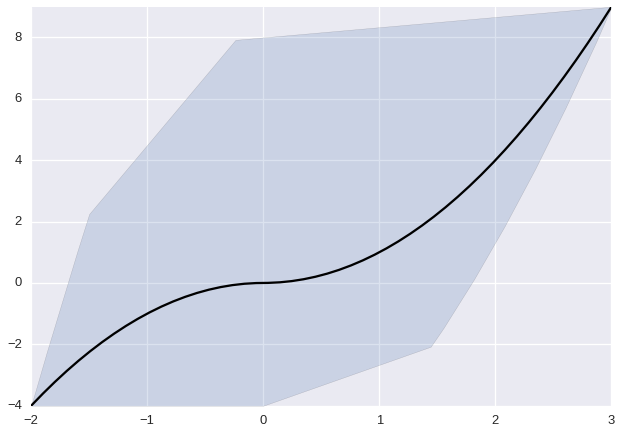

In [17]:
# compute "vertices" of this relaxation
v = poly.proj_sparse2verts(conss, [q, D, y, t], [q, D])

# plot convex hull
fig, ax = poly.plot2d( poly.polygon2D(v) )

# add actual function
ax.plot(qq, DD, color='black');

As can be seen, the relaxation is valid, but not tight.

In [18]:
# prepare for 3D plots
qq = np.linspace(qlb, qub)
tt = qq**2
DD = qq * np.abs(qq)

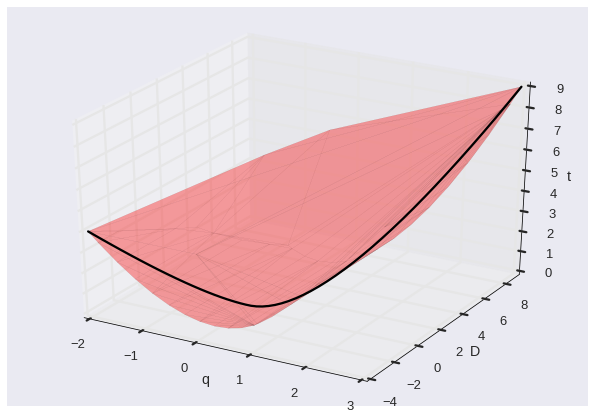

In [19]:
# project on (q, D, t)-space
v3d = poly.proj_sparse2verts(conss, [q, D, y, t], [q, D, t])

# plot the hull
fig, ax = poly.plot3d(
    poly.polygon3D(v3d, linewidth=0.1, facecolor='red'),
)

# add the curve
ax.plot3D(qq, DD, tt, color='black')

ax.set_xlabel('q')
ax.set_ylabel('D')
ax.set_zlabel('t');

## The other way

As in the example of the absolute value function, there is another, equivalent formulation, using the equation $D = (2y-1)t$. For the absolute value, this version gave stronger relaxations. We investigate here the comparison for the Weymouth equation.

In [20]:
# compute the McCormick relaxation
mc2 = mccormick.sparse_ineqs({t:1}, {y:2, b:-1}, {D:1}, [D, y, t], [Dlb, ylb, tlb], [Dub, yub, tub])
mc2

[{'D': 1.0, 't': 1.0},
 {'': 18.0, 'D': 1.0, 't': -1.0, 'y': -18.0},
 {'D': -1.0, 't': 1.0},
 {'D': -1.0, 't': -1.0, 'y': 18.0}]

In [21]:
# add the other constraints (same as before)
conss2 = mc2 + quad + varbounds + bounds
len(conss2)

31

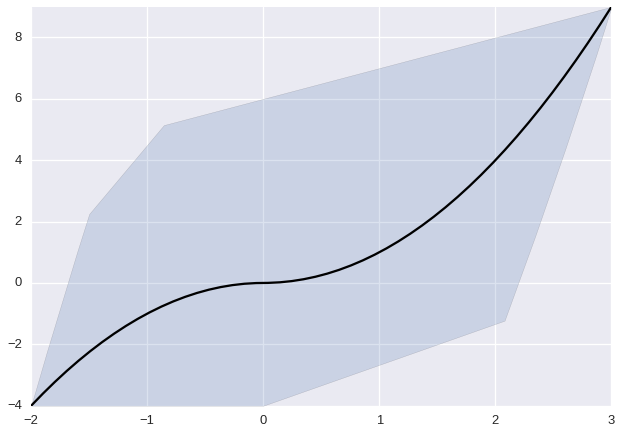

In [22]:
# project on (q, D)-space
v2 = poly.proj_sparse2verts(conss2, [q, D, y, t], [q, D])

# plot hull
fig, ax = poly.plot2d( poly.polygon2D(v2) )

# plot function graph
ax.plot(qq, DD, color='black');

It still doesn't good (not equal to convex hull), but is it better? Let's compare the two formulations.

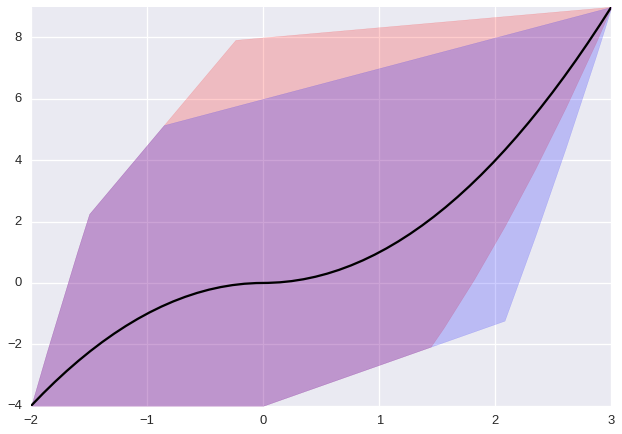

In [23]:
# Plot both regions, the original in red and the alternative in blue.
fig, ax = poly.plot2d( poly.polygon2D(v, color='red'), poly.polygon2D(v2, color='blue') )
ax.plot(qq, DD, color='black');

In this case, the two alternative formulations are not comparable: Neither is stronger than the other.

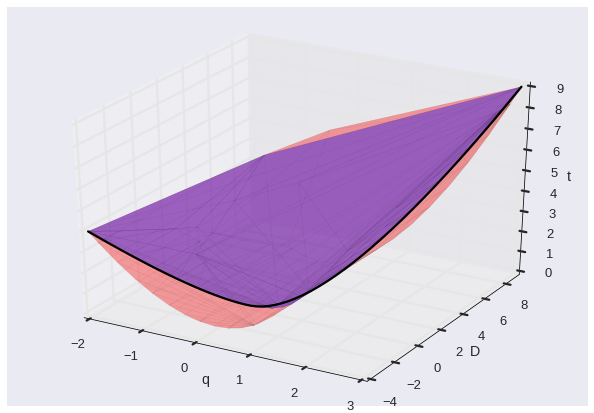

In [24]:
# Let's compare them again in 3D space.

# compute the vertices of the formulation in the paper
v3d = poly.proj_sparse2verts(conss, [q, D, y, t], [q, D, t])

# same for the alternative formulation
v23d = poly.proj_sparse2verts(conss2, [q, D, y, t], [q, D, t])

fig, ax = poly.plot3d(
    poly.polygon3D(v3d, linewidth=0.1, facecolor='red'),
    poly.polygon3D(v23d, linewidth=0.1, facecolor='blue'),
)

# add curve
ax.plot3D(qq, DD, tt, color='black')

ax.set_xlabel('q')
ax.set_ylabel('D')
ax.set_zlabel('t');

## Balas' disjunctive formulation

We model the pressure loss as a disjunction $D = q^2, q \ge 0 \quad \vee \quad -D = q^2, q \le 0$.
Note that this requires two quadratic constraints, one for each copy of the flow variable $q$.

In [25]:
disj = [
    [{q:1}, {q:-1, b:qub}, {D:1}, {D:-1, b:Dub}] + quadratic.hull(q, D, 0, qub),
    [{q:-1}, {q:1, b:-qlb}, {D:-1}, {D:1, b:-Dlb}] + [neg(i, D) for i in quadratic.hull(q, D, qlb, 0)],
]
ineqs, inds, copies = balas.disj(disj, [q, D], 'y')
print(len(ineqs))

58


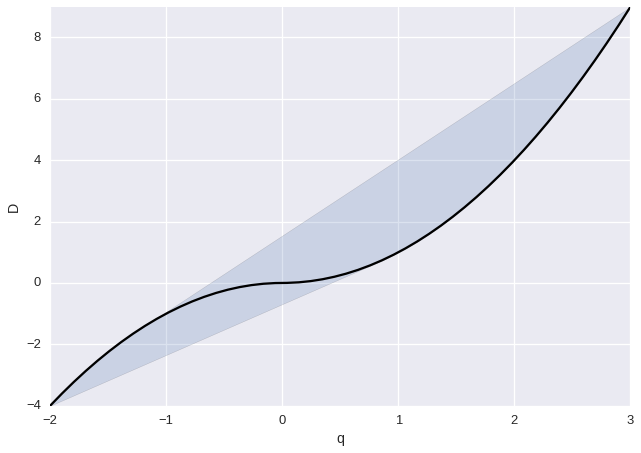

In [26]:
# compute projected vertices and plot in (q, d) space
v = poly.proj_sparse2verts(ineqs, [q, D] + inds + copies, [q, D])
fig, ax = poly.plot2d(poly.polygon2D(v))

# add curve
ax.plot(qq, DD, color='black')

ax.set_xlabel('q')
ax.set_ylabel('D');

As expected, we get the perfect convex hull.

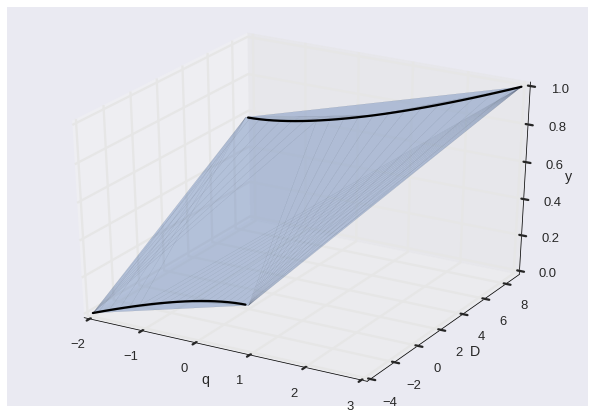

In [27]:
# How can we represent this in 3d?
# There is no explicit 't' variable, so use an indicator instead.

# compute projected vertices
v = poly.proj_sparse2verts(ineqs, [q, D] + inds + copies, [q, D, 'y#0'])

# plot convex hull
fig, ax = poly.plot3d(poly.polygon3D(v, linewidth=0.1))

# plot the two branches
ax.plot(qq[qq<=0], DD[qq<=0], np.zeros_like(qq[qq<=0]), color='black')
ax.plot(qq[qq>=0], DD[qq>=0], np.ones_like(qq[qq>=0]), color='black')

ax.set_xlabel('q')
ax.set_ylabel('D')
ax.set_zlabel('y');

## Comparison of the approaches

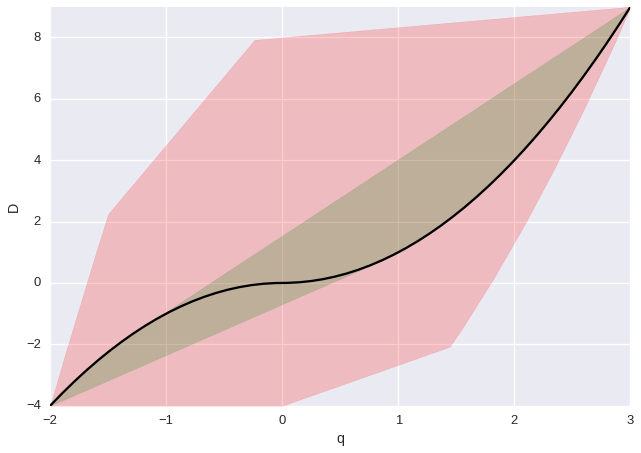

In [28]:
# Finally, compare the formulation by projection on the (q, D) space

# vertices for paper's formulation
vborraz = poly.proj_sparse2verts(conss, [q, D, y, t], [q, D])

# vertices for Balas' formulation
vbalas = poly.proj_sparse2verts(ineqs, [q, D] + inds + copies, [q, D])

# plot the convex hulls
fig, ax = poly.plot2d(
    poly.polygon2D(vborraz, color='r'),
    poly.polygon2D(vbalas, color='g')
)

# add curve
ax.plot(qq, DD, color='black');

ax.set_xlabel('q')
ax.set_ylabel('D');